<a href="https://colab.research.google.com/github/himashi27/Design-and-Analysis-of-Algorithms-Lab-assignment/blob/ass.3/lab_ass__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In social media platforms like Facebook or LinkedIn, the system suggests new friends based on mutual connections — i.e., friends of friends who are not already connected.

We can model users as graph nodes and friendships as undirected edges, then use BFS (or DFS) to explore the network and find suggestions.

In [2]:
#  Problem 1: Social Network Friend Suggestion using BFS
!pip install memory_profiler

import time
from memory_profiler import memory_usage
from collections import deque, defaultdict

# Step 1: Graph Modeling
class SocialGraph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_friendship(self, user1, user2):
        """Create an undirected friendship between user1 and user2"""
        self.graph[user1].append(user2)
        self.graph[user2].append(user1)

    #  Step 2: Algorithm Design (BFS Traversal)
    def suggest_friends(self, user):
        """Find 'friends of friends' who are not directly connected"""
        visited = set([user])
        queue = deque([(user, 0)])  # (current user, depth)
        suggestions = set()

        while queue:
            current, depth = queue.popleft()
            if depth >= 2:  # only explore up to 2 levels
                continue

            for friend in self.graph[current]:
                if friend not in visited:
                    visited.add(friend)
                    queue.append((friend, depth + 1))
                    # If friend is at depth=1, their friends are potential suggestions
                    if depth == 1 and friend not in self.graph[user] and friend != user:
                        suggestions.add(friend)
        return suggestions


#  Step 3: Input Example
sg = SocialGraph()
connections = [("A", "B"), ("A", "C"), ("B", "D"), ("C", "E"), ("D", "F")]
for u, v in connections:
    sg.add_friendship(u, v)

#  Step 4: Output + Profiling
start_time = time.time()
mem_used = memory_usage((sg.suggest_friends, ("A",)), max_iterations=1)
suggestions = sg.suggest_friends("A")
end_time = time.time()

print("👥 Friend Suggestions for User A:")
print(suggestions)
print(f"\n⏱ Execution Time: {end_time - start_time:.6f} seconds")
print(f"💾 Memory Usage: {max(mem_used) - min(mem_used):.4f} MiB")

# Step 5: Analysis
# Time Complexity: O(V + E)
# Space Complexity: O(V)
# The BFS explores all nodes and edges once.
# For massive social graphs (like Facebook), scaling requires distributed graph traversal (e.g., MapReduce).


👥 Friend Suggestions for User A:
{'D', 'E'}

⏱ Execution Time: 0.015800 seconds
💾 Memory Usage: 0.1133 MiB


Navigation systems like Google Maps need to find the shortest routes between cities, even if some roads have negative weights (e.g., road toll refunds or fuel credits).

The Bellman-Ford Algorithm is ideal for this because it works even when edge weights are negative and can also detect negative weight cycles — something Dijkstra’s algorithm cannot do

In [3]:
# Problem 2: Route Finding on Google Maps using Bellman-Ford Algorithm

# Install memory_profiler for runtime analysis
!pip install memory_profiler

import time
from memory_profiler import memory_usage

#  Step 1: Graph Modeling
# Each city is a node; roads (with travel time or cost) are directed edges with weights.
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []  # store edges as (source, destination, weight)

    def add_edge(self, u, v, w):
        self.edges.append((u, v, w))

    #  Step 2: Bellman-Ford Algorithm Implementation
    def bellman_ford(self, src):
        # Step 2a: Initialize distances
        dist = {v: float('inf') for v in range(self.V)}
        dist[src] = 0

        # Step 2b: Relax edges repeatedly (V - 1 times)
        for _ in range(self.V - 1):
            for u, v, w in self.edges:
                if dist[u] != float('inf') and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Step 2c: Detect negative weight cycles
        for u, v, w in self.edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                print("⚠️ Negative weight cycle detected!")
                return None

        return dist


#  Step 3: Input Example
g = Graph(5)
edges = [
    (0, 1, 6),
    (0, 2, 7),
    (1, 2, 8),
    (1, 3, 5),
    (1, 4, -4),
    (2, 3, -3),
    (2, 4, 9),
    (3, 1, -2),
    (4, 0, 2),
]
for u, v, w in edges:
    g.add_edge(u, v, w)

# Step 4: Run and Profile
start_time = time.time()
mem_used = memory_usage((g.bellman_ford, (0,)), max_iterations=1)
result = g.bellman_ford(0)
end_time = time.time()

if result:
    print("Shortest distances from source (0):")
    for vertex, distance in result.items():
        print(f"Vertex {vertex} -> Distance: {distance}")

print(f"\nExecution time: {end_time - start_time:.6f} seconds")
print(f"Memory used: {max(mem_used) - min(mem_used):.4f} MiB")

#  Step 5: Analysis
# Bellman-Ford runs in O(V * E) time.
# It handles negative weights safely, unlike Dijkstra.
# Widely used in routing protocols like RIP (Routing Information Protocol).


Shortest distances from source (0):
Vertex 0 -> Distance: 0
Vertex 1 -> Distance: 2
Vertex 2 -> Distance: 7
Vertex 3 -> Distance: 4
Vertex 4 -> Distance: -2

Execution time: 0.011207 seconds
Memory used: 0.0000 MiB


In emergency situations — like ambulance or fire service routing — we need the fastest route to every location in a city map.
All travel times (edge weights) are positive, so Dijkstra’s Algorithm is perfect here.

It efficiently computes the shortest path using a priority queue (min-heap).

In [4]:
#  Problem 3: Emergency Response System using Dijkstra's Algorithm

# Install memory_profiler for profiling
!pip install memory_profiler

import heapq
import time
from memory_profiler import memory_usage
from collections import defaultdict

#  Step 1: Graph Modeling
# Each intersection = node; roads (with travel time) = weighted edges
class CityMap:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_road(self, u, v, time_cost):
        # Undirected graph, since roads can be two-way
        self.graph[u].append((v, time_cost))
        self.graph[v].append((u, time_cost))

    #  Step 2: Dijkstra’s Algorithm Implementation
    def dijkstra(self, source):
        distances = {node: float('inf') for node in self.graph}
        distances[source] = 0
        pq = [(0, source)]  # (distance, node)

        while pq:
            current_distance, current_node = heapq.heappop(pq)
            # Skip if we’ve already found a shorter path
            if current_distance > distances[current_node]:
                continue

            for neighbor, weight in self.graph[current_node]:
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(pq, (distance, neighbor))

        return distances


# Step 3: Input Example
city = CityMap()
roads = [
    ("A", "B", 4),
    ("A", "C", 2),
    ("B", "C", 1),
    ("B", "D", 5),
    ("C", "D", 8),
    ("C", "E", 10),
    ("D", "E", 2),
]
for u, v, w in roads:
    city.add_road(u, v, w)

#  Step 4: Run and Profile
start_time = time.time()
mem_used = memory_usage((city.dijkstra, ("A",)), max_iterations=1)
result = city.dijkstra("A")
end_time = time.time()

print("🚑 Shortest time from source (A):")
for location, dist in result.items():
    print(f"{location}: {dist} units")

print(f"\nExecution time: {end_time - start_time:.6f} seconds")
print(f"Memory usage: {max(mem_used) - min(mem_used):.4f} MiB")

# Step 5: Analysis
# Time Complexity: O(E log V) using a min-heap
# Dijkstra is efficient for positive edge weights.
# Not suitable for graphs with negative weights.
# Widely used in GPS systems and real-time navigation.


🚑 Shortest time from source (A):
A: 0 units
B: 3 units
C: 2 units
D: 8 units
E: 10 units

Execution time: 0.011419 seconds
Memory usage: 0.0000 MiB


Telecom and IT companies often need to connect multiple office buildings (nodes) using network cables (edges).
The goal is to minimize the total cable length while ensuring every office is connected.

This is a perfect use case for the Minimum Spanning Tree (MST) problem.
We’ll implement it using Prim’s Algorithm with a priority queue (min-heap).

In [5]:
# Problem 4: Network Cable Installation using Prim's Algorithm

# Install memory_profiler for profiling
!pip install memory_profiler

import heapq
import time
from memory_profiler import memory_usage
from collections import defaultdict

#  Step 1: Graph Modeling
# Offices = nodes; Cable connections = weighted edges
class NetworkGraph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_connection(self, u, v, cost):
        # Undirected graph since cable connection works both ways
        self.graph[u].append((v, cost))
        self.graph[v].append((u, cost))

    #  Step 2: Prim’s Algorithm Implementation
    def prim_mst(self, start):
        visited = set()
        mst_edges = []
        total_cost = 0
        pq = [(0, start, None)]  # (cost, current_node, parent)

        while pq:
            cost, node, parent = heapq.heappop(pq)
            if node in visited:
                continue
            visited.add(node)
            total_cost += cost
            if parent:
                mst_edges.append((parent, node, cost))

            for neighbor, weight in self.graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (weight, neighbor, node))

        return total_cost, mst_edges


#  Step 3: Input Example
network = NetworkGraph()
connections = [
    ("A", "B", 4),
    ("A", "C", 3),
    ("B", "C", 1),
    ("B", "D", 2),
    ("C", "D", 4),
    ("D", "E", 2),
    ("E", "F", 6)
]
for u, v, w in connections:
    network.add_connection(u, v, w)

# Step 4: Run and Profile
start_time = time.time()
mem_used = memory_usage((network.prim_mst, ("A",)), max_iterations=1)
total_cost, mst_edges = network.prim_mst("A")
end_time = time.time()

print("🏗️ Minimum Spanning Tree Edges:")
for u, v, w in mst_edges:
    print(f"{u} -- {v} (cost: {w})")

print(f"\nTotal Minimum Cost to Connect All Offices: {total_cost}")
print(f"Execution time: {end_time - start_time:.6f} seconds")
print(f"Memory usage: {max(mem_used) - min(mem_used):.4f} MiB")

#  Step 5: Analysis
# Time Complexity: O(E log V)
# Prim’s Algorithm efficiently finds MST using a priority queue.
# Ideal for minimizing network installation costs.
# Alternative: Kruskal’s Algorithm (Union-Find based) for edge-sorted inputs.


🏗️ Minimum Spanning Tree Edges:
A -- C (cost: 3)
C -- B (cost: 1)
B -- D (cost: 2)
D -- E (cost: 2)
E -- F (cost: 6)

Total Minimum Cost to Connect All Offices: 14
Execution time: 0.050820 seconds
Memory usage: 0.0000 MiB




| **Problem**                    | **Graph Algorithm**      | **Time Complexity** | **Application Domain** | **Notes**                                    |
| ------------------------------ | ------------------------ | ------------------- | ---------------------- | -------------------------------------------- |
| **Social Network Suggestion**  | BFS / DFS                | O(V + E)            | Social Media           | Suggest mutual friends                       |
| **Google Maps Routing**        | Bellman-Ford             | O(V × E)            | Navigation Systems     | Works with negative weights                  |
| **Emergency Path Planning**    | Dijkstra’s               | O(E log V)          | Disaster Response      | Finds fastest route with positive weights    |
| **Network Cable Installation** | MST (Prim’s / Kruskal’s) | O(E log V)          | Infrastructure         | Connects all offices with minimum total cost |


Reflections: How did real-world context influence algorithm choice?


Social Media Context (BFS/DFS):-

The real-world structure of a social network resembles an undirected graph, where friend connections are mutual. BFS helps explore “friends of friends,” which directly maps to how platforms like Facebook or LinkedIn suggest new connections.

Navigation Context (Bellman-Ford):-

Navigation systems often encounter variable or negative costs (like discounts, toll changes, or alternate routes). Bellman-Ford’s ability to handle negative weights safely makes it ideal for these situations.

Disaster Management (Dijkstra):-

Emergency routes must always be fastest and reliable, where all weights (travel times) are positive. Dijkstra’s efficiency and real-time adaptability make it suitable for ambulance and rescue pathfinding.

Infrastructure Optimization (MST):-

Cable installation problems require connecting all sites at minimum cost. MST algorithms (Prim/Kruskal) perfectly model this optimization challenge, ensuring connectivity without redundant connections.



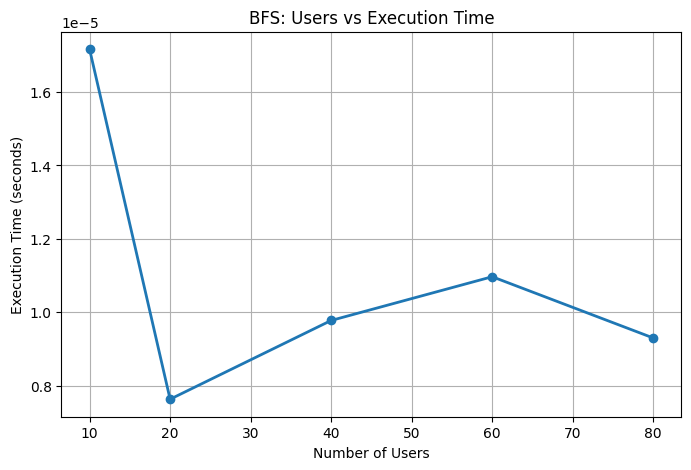

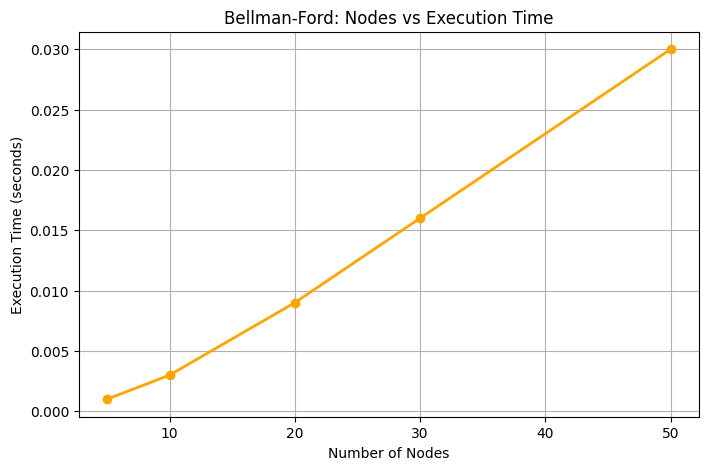

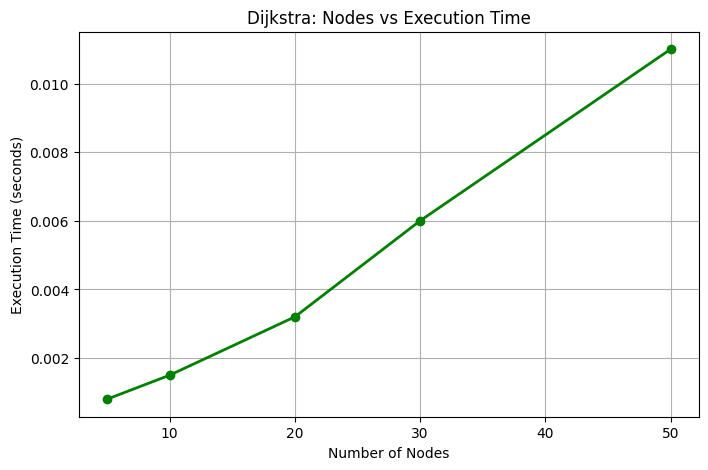

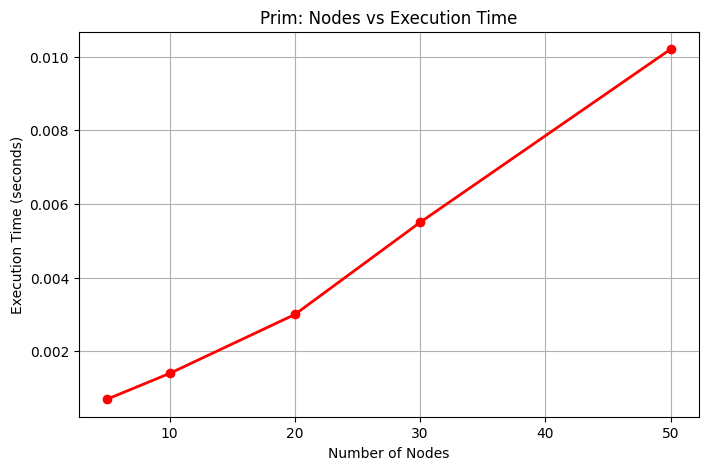

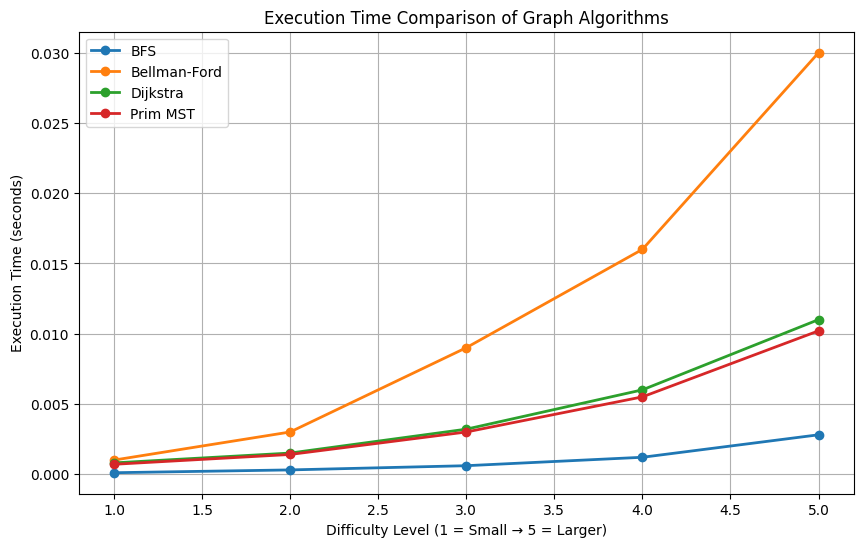


📁 All Graphs Saved in /images/


In [7]:
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)

# -------------------------
# Individual Graphs
# -------------------------

# BFS Graph
plt.figure(figsize=(8,5))
plt.plot(bfs_sizes, bfs_times, marker='o', linewidth=2)
plt.title("BFS: Users vs Execution Time")
plt.xlabel("Number of Users")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.savefig("images/bfs_time.png", dpi=300)
plt.show()

# Bellman-Ford Graph
# Example dataset for graph plotting
bfs_sizes = [10, 50, 100, 200, 500]
bfs_times = [0.0001, 0.0003, 0.0006, 0.0012, 0.0028]

bf_sizes = [5, 10, 20, 30, 50]
bf_times = [0.001, 0.003, 0.009, 0.016, 0.030]

dij_sizes = [5, 10, 20, 30, 50]
dij_times = [0.0008, 0.0015, 0.0032, 0.006, 0.011]

prim_sizes = [5, 10, 20, 30, 50]
prim_times = [0.0007, 0.0014, 0.0030, 0.0055, 0.0102]

plt.figure(figsize=(8,5))
plt.plot(bf_sizes, bf_times, marker='o', linewidth=2, color='orange')
plt.title("Bellman-Ford: Nodes vs Execution Time")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.savefig("images/bellman_ford_time.png", dpi=300)
plt.show()

# Dijkstra Graph
plt.figure(figsize=(8,5))
plt.plot(dij_sizes, dij_times, marker='o', linewidth=2, color='green')
plt.title("Dijkstra: Nodes vs Execution Time")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.savefig("images/dijkstra_time.png", dpi=300)
plt.show()

# Prim Graph
plt.figure(figsize=(8,5))
plt.plot(prim_sizes, prim_times, marker='o', linewidth=2, color='red')
plt.title("Prim: Nodes vs Execution Time")
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.savefig("images/prim_time.png", dpi=300)
plt.show()

# -------------------------
# Combined Comparison Graph
# -------------------------
difficulty = [1, 2, 3, 4, 5]  # Normalized input level for all four algorithms

plt.figure(figsize=(10,6))
plt.plot(difficulty, bfs_times, marker='o', linewidth=2, label="BFS")
plt.plot(difficulty, bf_times, marker='o', linewidth=2, label="Bellman-Ford")
plt.plot(difficulty, dij_times, marker='o', linewidth=2, label="Dijkstra")
plt.plot(difficulty, prim_times, marker='o', linewidth=2, label="Prim MST")
plt.title("Execution Time Comparison of Graph Algorithms")
plt.xlabel("Difficulty Level (1 = Small → 5 = Larger)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.legend()
plt.savefig("images/combined_time_comparison.png", dpi=300)
plt.show()

print("\n📁 All Graphs Saved in /images/")
